In [3]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("/content/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [7]:
# Extra. I worked with a tutor on this and used this to better understand the data.
df_columns=market_data_df.columns

In [6]:
# Extra. I worked with a tutor on this. Used this code to better understand the data
market_data_df.index

Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
normalized_data = scaler.fit_transform(market_data_df)

normalized_data

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [9]:
# I worked with the tutor on this code. She helped me better understand the significance of each
# part of the code and what it means.
# Create a DataFrame with the scaled data
normalized_df = pd.DataFrame(normalized_data, columns=df_columns)

# Copy the crypto names from the original data
normalized_df['coin_id']=market_data_df.index

# Set the coin_id column as index
normalized_df.set_index('coin_id', inplace=True)

# Display sample data
normalized_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Create a list with the number of k-values to try
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(normalized_df)
    inertia.append(k_model.inertia_)

# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow


,k,inertia
0,1,287.000000
1,2,212.123342
2,3,165.136752
3,4,79.022435
4,5,66.413051
5,6,61.634088
6,7,46.074467
7,8,43.392694
8,9,32.913223
9,10,30.469111


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

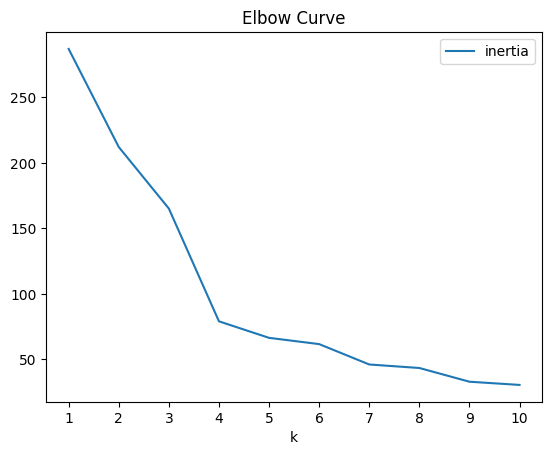

In [11]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y= "inertia",
    title="Elbow Curve",
    xticks=k
)

#### Answer the following question:
**Question:** What is the best value for `k`?

**Answer:** 4 is the K value. Note: I received help from the tutor on this response. We tried out various K values and observed the results and discussed the principles behind selecting the various K values.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [39]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [40]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Fit the K-Means model using the scaled data
model.fit(normalized_df)

KMeans(n_clusters=4, n_init='auto', random_state=1)

In [41]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model.predict(normalized_df)

# View the resulting array of cluster values.
predictions

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [42]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Create a copy of the DataFrame
normalized_df_predictions = normalized_df.copy()

In [43]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Add a new column to the DataFrame with the predicted clusters
normalized_df_predictions["crypto_cluster"]= predictions

# Display sample data
normalized_df_predictions.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

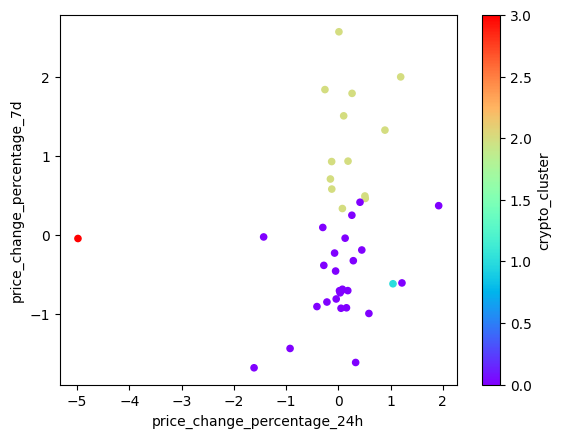

In [44]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Create a scatter plot using Pandas plot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
normalized_df_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap="rainbow")

### Optimize Clusters with Principal Component Analysis.

In [45]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)




In [46]:
# I used the AI tool in colab to generate this code & overseen by tutor
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(normalized_df)

# View the first five rows of the DataFrame.
pca_data[:5]




array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [47]:
# I used the AI tool in colab to generate this code
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_



array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is as follows:

Add the values together:
( 0.3719856 + 0.34700813 + 0.17603793 = 0.89503166 )
So, the total explained variance of the three principal components is approximately 89.5%. This means that these three components together capture about 89.5% of the total variance in the original dataset, which is a good amount for retaining the most important information while reducing dimensionality.

(I had help from X-pert Learning on this response.

In [48]:
# I used X-pert and Colab AI to help me with this code. Although this says the code was furnished,
# I was not able to find it, but I did figure it out with the help of AI tutors and coaching.
# Create a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Copy the crypto names from the PCA data
pca_df['coin_id']=normalized_df.index

# Set the coin_id column as index
pca_df.set_index('coin_id', inplace=True)

# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [49]:
# I copied and pasted this code from a prior inclass lecture/assignment and made required edits.
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(pca_df[['PC1', 'PC2', 'PC3']])
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow.head(10)


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,115.918077
3,4,49.665497
4,5,38.584870
5,6,27.618972
6,7,23.793714
7,8,17.823822
8,9,14.123195
9,10,11.116837


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

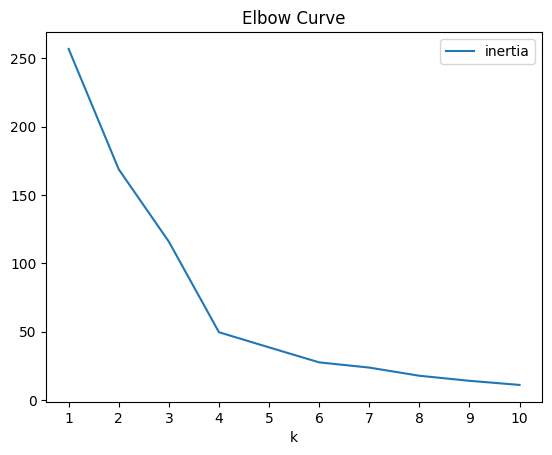

In [50]:
# I used the AI tool in colab to generate this code. Also same as above + from prior inclass assignment
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y= "inertia",
    title="Elbow Curve",
    xticks=k
)


#### Answer the following questions:
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no the response is the same as the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [51]:
# I used the AI tool in colab to generate this code
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [52]:
# I used the AI tool in colab to generate this code
# Fit the K-Means model using the PCA data
model.fit(pca_df[['PC1', 'PC2', 'PC3']])


KMeans(n_clusters=4, n_init='auto', random_state=1)

In [53]:
# I used the AI tool in colab to generate this code
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions = model.predict(pca_df[['PC1', 'PC2', 'PC3']])

# Print the resulting array of cluster values.
predictions


array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [54]:
# Create a copy of the DataFrame with the PCA data
pca_df_predictions = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_predictions["crypto_cluster"]= predictions

# Display sample data
pca_df_predictions.head(10)


,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


<Axes: xlabel='PC1', ylabel='PC2'>

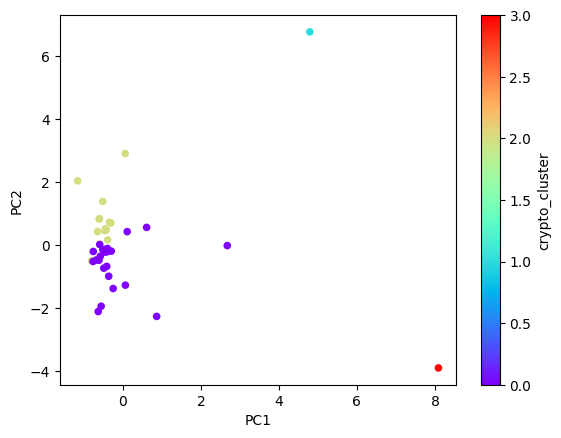

In [56]:
# copied and pasted code from above, then modified it. Colab AI did not work here.
# Create a scatter plot using hvPlot by setting `x="PC1"` and `y="PC2"'
pca_df_predictions.plot.scatter(
    x="PC1",
    y="PC2",
    c="crypto_cluster",
    colormap="rainbow")


### Determine the Weights of Each Feature on each Principal Component

In [59]:
# I used colab to help me generate this code. I had to tweek it a lot to have it work.

# prompt: # Use the columns from the original scaled DataFrame as the index.

# Use the following code to determine the weights of each feature on each principal component.
# Create a DataFrame with the PCA model's components
pc_df_df = pd.DataFrame(
    pca.components_,
    columns=normalized_df.columns,
    index=["PC1", "PC2", "PC3"]
)

# Display the DataFrame
pc_df


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


##### I figured this answer out by myself + hand held calculator.
#### Answer the following question:

* **Question:** Which features have the strongest positive or negative influence on each component?

* **Answer:** *price_change_percentage_24h* has the strongest negative influence @ -0.277361. While *price_change_percentage_7d* has the strongest positive influence @ 0.980782 with the *price_change_percentage_14d* is the next strongest positive influence @ 0.880787

    